# Data Exploration / Visualization (Part 2):

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# params

path = "DATA/dades_excels"
path_old = path + "/base de dades estudiants (1).xlsx"
path_new = path + "/base de datos reducida.xlsx"
path_complete = path + "/base de datos seguiments130618.xlsx"

In [3]:
df_old = pd.read_excel(path_old)
df_new = pd.read_excel(path_new)
df_complete = pd.read_excel(path_complete)

## Violin chart: IMT versus Death by CV event

In this violin chart we show the histograms of  IMT of subjects that died either by CV event or non CV event, separated by gender.

In [13]:
columns_interest = ["Códigobiobanco","sexo","Tabaquismo_Si_No","Ingestaalcoholgdia","diabetes","hipertenso",
                    "dislipemico",
                   "Edadfechaexploracionvascular","GIMmedio","GIM_Med_TRUNC","GIM_Med_CC_TRUNC","ITB",
                    "nplacas_carotid",
                   "nplacas_femoral","clasif_cc_d","clasif_med_bif_d","clasif_med_car_d","clasif_cc_i",
                    "clasif_med_bif_i",
                   "clasif_med_car_i","clasif_fem_com_d","clasif_fem_sup_d","clasif_fem_com_i",
                    "clasif_fem_sup_i",
                   "DescECV1","TipoECV1","muerte","CausaMuerte","DescMuerte","Muerte_S_N","EventoCV_Si_No", "ECV1"]

DF = df_complete[columns_interest]

In [14]:
DF = DF[DF["muerte"]!="Alive"]
DF["sexo"] = np.where(DF["sexo"]==0,"hombre","mujer")
DF.head()

,Códigobiobanco,sexo,Tabaquismo_Si_No,Ingestaalcoholgdia,diabetes,hipertenso,dislipemico,Edadfechaexploracionvascular,GIMmedio,GIM_Med_TRUNC,...,clasif_fem_com_i,clasif_fem_sup_i,DescECV1,TipoECV1,muerte,CausaMuerte,DescMuerte,Muerte_S_N,EventoCV_Si_No,ECV1
1,1802,hombre,1,10,1,1,0,65,NaN,1.500000,...,NaN,NaN,NaN,NaN,non-CV death,Neoplasia,Neoplasia,1,0,0
19,1821,hombre,0,0,0,1,1,43,0.695000,0.695000,...,NaN,NaN,Infarto agudo miocardio,Infarto agudo miocardio,CV death,Isquemia miocárdica e infarto,Isquemia miocárdica e infarto,1,0,1
25,1828,mujer,0,0,0,1,0,66,0.666667,0.875000,...,NaN,NaN,NaN,NaN,non-CV death,Infecciones,Infecciones,1,0,0
50,1855,mujer,0,0,0,0,1,68,0.748000,0.748000,...,NaN,NaN,NaN,NaN,non-CV death,Neoplasia,Neoplasia,1,0,0
53,1858,hombre,0,3,0,1,1,68,0.776667,0.776667,...,NaN,NaN,NaN,NaN,non-CV death,Otras,Otras,1,0,0


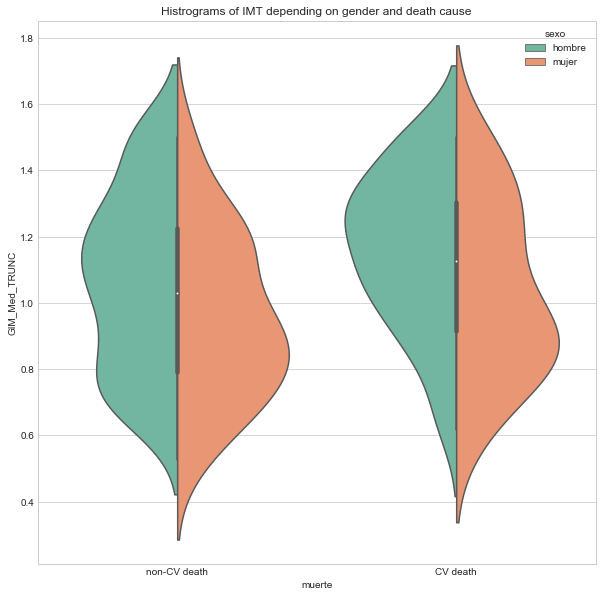

In [15]:
import seaborn as sns

IMT = "GIM_Med_TRUNC"
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.violinplot(x="muerte",y=IMT, hue="sexo",data=DF,palette="Set2", split=True)

plt.title("Histrograms of IMT depending on gender and death cause")
plt.show()

What we can intuitively see is that on average for male subjects the IMT tends to higher values than female sibjects that dead for CV events. For non CV events the  IMT has a more uniform shape. 

Here we show the number of subjects for each category.

In [16]:


DF.pivot_table(index="muerte",columns="sexo",values = "Códigobiobanco",aggfunc = np.count_nonzero)



sexo,hombre,mujer
muerte,,
CV death,47,23
non-CV death,84,37


Let's see now if this trend remains when looking for CV events instead of deaths by CV events :

In [1]:
columns_interest = ["Códigobiobanco","sexo","Tabaquismo_Si_No","Ingestaalcoholgdia","diabetes","hipertenso",
                    "dislipemico",
                   "Edadfechaexploracionvascular","GIMmedio","GIM_Med_TRUNC","GIM_Med_CC_TRUNC","ITB",
                    "nplacas_carotid",
                   "nplacas_femoral","clasif_cc_d","clasif_med_bif_d","clasif_med_car_d","clasif_cc_i",
                    "clasif_med_bif_i",
                   "clasif_med_car_i","clasif_fem_com_d","clasif_fem_sup_d","clasif_fem_com_i",
                    "clasif_fem_sup_i",
                   "DescECV1","TipoECV1","muerte","CausaMuerte","DescMuerte","Muerte_S_N","EventoCV_Si_No", "ECV1"]

DF = df_complete[columns_interest]

NameError: name 'df_complete' is not defined

In [43]:
#DF = DF[DF["ECV1"]!="Alive"]
DF["sexo"] = np.where(DF["sexo"]==0,"Male","Female")


/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


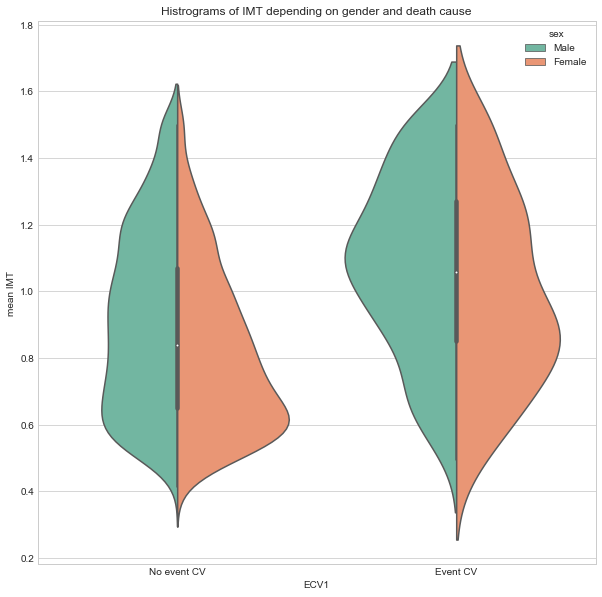

In [44]:
import seaborn as sns

IMT = "GIM_Med_TRUNC"
DF["ECV1"] = np.where(DF["ECV1"] == 0, "No event CV", "Event CV")
DF = DF.rename(columns = {"GIM_Med_TRUNC": "mean IMT", "sexo":"sex"})
ax = plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.violinplot(x="ECV1",y="mean IMT", hue="sex",data=DF,palette="Set2", split=True)
#ax.legend(ncol=2, loc="upper right", frameon=True)
#ax.set(xlabel="CV Events yes/no")

plt.title("Histrograms of IMT depending on gender and death cause")
plt.show()

We see that while the distribution on male subjects remains quite similar, for females the IMT value is accumulated towards lower values for subjects that didn't suffered any CV event.


We perform a T-test to determine weather the IMT is correlated with the cause of death.
We would like to assert that the mean of the IMT values of the Non casdiavascular death cause distribution is higher than the IMT values of the cardiovascular death causes distribution.

Assuming that both distributions have the same variance our hyptessis are:
$$
H_0: \mu_0=\mu_1
$$
$$
H_A: \mu_0 \neq \mu_1
$$

where $\mu_0$ and $\mu_1$ are the mean of the IMT values distributions of patients with cardiovascular and not cardiovascular cause of death respetively. 


In [92]:
# males
from scipy.stats import ttest_ind
DF_males = DF[DF["sex"]=="Male"]
data_mortCard=DF_males["mean IMT"][DF["ECV1"]=="Event CV"].fillna(0).values
data_NomortCard=DF_males["mean IMT"][DF["ECV1"]=="No event CV"].fillna(0).sample(n=len(data_mortCard)).values
twosample_results = ttest_ind(data_mortCard, data_NomortCard)

twosample_results

Ttest_indResult(statistic=4.2466882548173164, pvalue=2.8202591043107945e-05)

In [88]:
print("variance male with CV :",np.var(data_mortCard))
print("variance male withOUT CV :",np.var(data_NomortCard))

variance male with CV : 0.0689711715631
variance male withOUT CV : 0.0657827411006


In [95]:
# females
DF_females = DF[DF["sex"]=="Female"]
data_mortCard=DF_females["mean IMT"][DF["ECV1"]=="Event CV"].fillna(0).values
data_NomortCard=DF_females["mean IMT"][DF["ECV1"]=="No event CV"].fillna(0).values
twosample_results = ttest_ind(data_mortCard, data_NomortCard)

twosample_results

Ttest_indResult(statistic=5.4592229340707581, pvalue=5.8106201733453134e-08)

In [90]:
print("variance female with CV :",np.var(data_mortCard))
print("variance female withOUT CV :",np.var(data_NomortCard))

variance female with CV : 0.0892851586706
variance female withOUT CV : 0.0598768176216


We obtain a p-value of 5.8106201733453134e-08. Hence there is statistical evidence to reject the null hypotesis.

In [20]:
#200 eventos registrats de los cuales 191 morts 

DF.pivot_table(index="ECV1",columns="sexo",values = "Códigobiobanco",aggfunc = np.count_nonzero)

# mirar si està normalitzat les histogrames o no 


sexo,hombre,mujer
ECV1,,
Event CV,167,73
No event CV,1639,1125
